<a href="https://colab.research.google.com/github/annikahurd/167notes/blob/main/Project1_Hurd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. 

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify). 

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Mounted at /content/drive


#1. Name: Annika Hurd

# 2. Data Description
Answer the following questions:
- Explain what dataset you chose, and why you chose it. 

I chose to use the College Admissions dataset. This dataset contains statistics, like GRE score and chance-of-admittance of undergraduate students who applied to graduate school. As someone who is considering grad school, I thought that this dataset would be interesting to look at. 
- Specify which columns you are using as your __predictor variables__

The columns that I am using for my predictor variables are GRE Score (student's score on GRE), TOEFL Score (student's score on Test of English as a Foreign Language), University Rating (prestige of University on a scale of 1-5), SOP (strength of student's statement of purpose on a scale of 1-5), LOR (strength of student's letter of rec on a scale of 1-5), CGPA (student's undergraduate GPA), and Research (if the student has completed research or not). 
- What variable are you selecting as your __target variable__? 

My target variable is Chance of Admit, which is the student's percentage chance of getting admitted to graduate school. 
- In selecting this target variable, does this make your problem a __classification__ or a __regression__? 

This target variable mandates a regression analysis. 

# 3. Research Question
As clearly/specifcially as possible, state the question you are trying to solve in this project.
> For example, if I was working with the Iris dataset, I might ask 'how accurately can we predict the species of Iris from these 4 measurements?'

How accurately can we predict a student's Chance of Admittance into graduate school based on GRE Score, TOEFL Score, University Rating, strength of Statement of Purpose, strength of Letter of Rec, GPA, and Research experience?

# 4. Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

In [ ]:
adm_data = pd.read_csv('/content/drive/MyDrive/CS167/Datasets/adm_data.csv')


#First, we need to check if there is any missing data from the set
adm_data.isna().any()

#We see that there is not, which means we do not have to clean any missing data
#Additionally, all of the data is numberic, so we do not need to create any dummies. 

#Serial No. is just another index, so we will drop that column

adm_data.drop('Serial No.', inplace = True, axis = 1)

adm_data.head()
adm_data.columns

#Now, I am just prepping the data and subsetting it into target, target_sln, test, and test_sln
predictors = ['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
target = "Chance of Admit "
train_data, test_data, train_sln, test_sln = \
        train_test_split(adm_data[predictors], adm_data[target], test_size = 0.2, random_state=41)

adm_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# 5. Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

I will be using $R^2$ for my metric of accuracy. This is because the model that I am producing is a regression, so this metric is appropriate. I am choosing $R^2$ over MAE and MSE because $R^2$ is the more intuitively interpretable, so it would be a good metric to use for data analysis when the analysis is presented. 

# 6. Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

Some helpful links:
- [Sklearn Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)


In [ ]:
r2_score
# build and test a baseline model here
dummy_data = DummyRegressor() #make random guesses #look in the api for other strategies
dummy_data.fit(train_data, train_sln)
preds = dummy_data.predict(test_data)

print("r^2:", r2_score(test_sln, preds))

r^2: -0.0014319593565470523


# 7. Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one. Basically make your plan to test your research question and then test it.

My plan to test my research question is to run the kNN, wkNN, Decision Tree, and Random Forest algorithms with the same training and testing data to evaluate which model performs the best. Not only that, but I will tune parameters that are important to each model to determine how I can make each model the most successful. 


In [ ]:
# Execute your plan here (build and test your models to answer your question)

[0.5705314519948617, 0.630791300229318, 0.6687781181390604, 0.715052013943076, 0.7297360288129644, 0.7535863819141329, 0.7574460530534779, 0.7620262011932711, 0.7665906564328598, 0.7722351514077668, 0.7795987430246534, 0.7797533118970087, 0.7836374329254046, 0.7812196137386599, 0.780689210774498, 0.7800332391755458, 0.7845778794662966, 0.7772293127667789, 0.7763090808622841, 0.7812512990708024, 0.7774849578215407, 0.7755302806663148, 0.7770379850444307, 0.7757868867013389, 0.7769262672968082, 0.7750707483863597, 0.7746422136582931, 0.7792354123867014, 0.7757908073314532, 0.7768701981705297, 0.7764593906012928, 0.777041716038456, 0.7755817045411562, 0.7728459930834992, 0.7714453719909452, 0.7677913964357514, 0.7677657835984003, 0.7635610202220248, 0.7619579979109307, 0.7572368039961973, 0.7568300605078424, 0.7562030092369328, 0.7598827608601388, 0.7602178597880164, 0.7596669902854218, 0.759752456919738, 0.7547975955660107, 0.7548059763219854, 0.755841808246867, 0.7556109977204502, 0.755

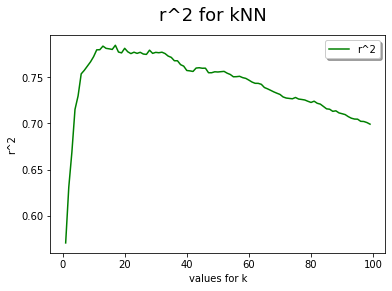

In [ ]:
#kNN
kNN_r2 = []
for i in range (1, 100):
  knn= neighbors.KNeighborsRegressor(n_neighbors=i)
  knn.fit(train_data, train_sln)
  knn_preds= knn.predict(test_data)
  knn_r2 = metrics.r2_score(test_sln, knn_preds)
  kNN_r2.append(knn_r2)
print(kNN_r2)

import matplotlib.pyplot as plt
%matplotlib inline  

xvals = range(1, 100)
plt.suptitle('r^2 for kNN', fontsize=18)
plt.xlabel('values for k')
plt.ylabel('r^2')
plt.plot(xvals, kNN_r2, 'g-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()


[0.5705314519948614, 0.6420834506059863, 0.6737169701771526, 0.7214013425023693, 0.7432592406031968, 0.761676323425974, 0.7656548558638636, 0.7715830866548212, 0.7757961873574937, 0.780694830789083, 0.786420040771697, 0.7873689111015518, 0.7908599195351991, 0.789927636027439, 0.7900187613688627, 0.7891979003762024, 0.7926556871118727, 0.7877537284198921, 0.7865910829371818, 0.7904552879970587, 0.7876038717191102, 0.7865763865189126, 0.7874602631333587, 0.7867631196039784, 0.7876487687343576, 0.7864249082997548, 0.7863965300910353, 0.7894858409907187, 0.7871954850510152, 0.7877416954837081, 0.787951802821471, 0.7886389483151455, 0.7874326309500306, 0.7856507823006096, 0.7845168925238745, 0.7822754464945731, 0.7823139576639754, 0.7793459315449027, 0.7786433921584592, 0.775528033801033, 0.7753421412391154, 0.7748523268198493, 0.7769520179535921, 0.7774442141553465, 0.777233357344943, 0.777587304675132, 0.7749555856858663, 0.7752165400514882, 0.776029671960049, 0.7761666761038123, 0.776229

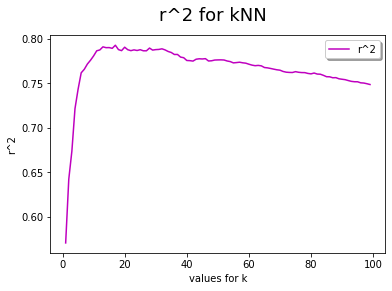

In [ ]:
#wkNN

#kNN
wkNN_r2 = []
for i in range (1, 100):
  wknn= neighbors.KNeighborsRegressor(n_neighbors=i, weights = 'distance')
  wknn.fit(train_data, train_sln)
  wknn_preds= wknn.predict(test_data)
  wknn_r2 = metrics.r2_score(test_sln, wknn_preds)
  wkNN_r2.append(wknn_r2)
print(wkNN_r2)

import matplotlib.pyplot as plt
%matplotlib inline  

xvals = range(1, 100)
plt.suptitle('r^2 for kNN', fontsize=18)
plt.xlabel('values for k')
plt.ylabel('r^2')
plt.plot(xvals, wkNN_r2, 'm-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()



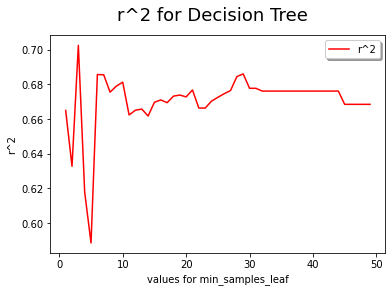

In [ ]:
#decision tree
dt_list = []

for i in range (1, 50):
  dtree = tree.DecisionTreeRegressor(min_samples_leaf = i)
  dtree.fit(train_data, train_sln)

  dpreds= dtree.predict(test_data)
  dr2 = r2_score(test_sln, dpreds)
  dt_list.append(dr2)

xvals = range(1, 50)
plt.suptitle('r^2 for Decision Tree', fontsize=18)
plt.xlabel('values for min_samples_leaf')
plt.ylabel('r^2')
plt.plot(xvals, dt_list, 'r-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

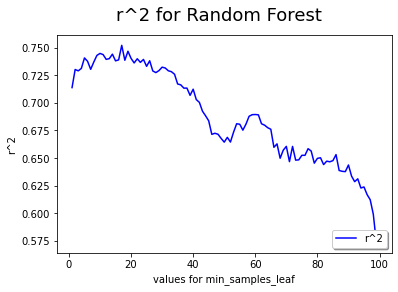

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_list = []

for i in range (1, 100):
  n_forest = RandomForestRegressor(min_samples_leaf = i)
  n_forest.fit(train_data, train_sln)
  n_forest_preds = n_forest.predict(test_data)
  n_r2=metrics.r2_score(test_sln, n_forest_preds)
  rf_list.append(n_r2)


xvals = range(1, 100)
plt.suptitle('r^2 for Random Forest', fontsize=18)
plt.xlabel('values for min_samples_leaf')
plt.ylabel('r^2')
plt.plot(xvals, rf_list, 'b-', label='r^2')
plt.legend(loc='lower right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()


# 8. Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune. 

You should be able to fill in this table (but it doesn't count as a visualization): 

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |      0.7845778794662966              |   0.7520500721148256              |               k=17       |
| w-kNN         |     0.7877537284198921               |     0.7710229503361941            |       k=18              |
| decision tree |    0.7240458431438025                | 0.7200438910828753               |min_samples_leaf = 3                   
| random forest |  0.743001594060523                  |    0.7417247183040159            |  min_samples_leaf = 18                   |

In [ ]:
#non-normalized data analysis

knn_18= neighbors.KNeighborsRegressor(n_neighbors=17)
knn_18.fit(train_data, train_sln)
knn_18_preds= knn_18.predict(test_data)
knn_18_r2 = metrics.r2_score(test_sln, knn_18_preds)
print("kNN with k=18--r^2:", knn_18_r2)

wknn_18= neighbors.KNeighborsRegressor(n_neighbors=18, weights = 'distance')
wknn_18.fit(train_data, train_sln)
wknn_18_preds= wknn_18.predict(test_data)
wknn_18_r2 = metrics.r2_score(test_sln, wknn_18_preds)
print("Weighted kNN with k=18-- r^2:", wknn_18_r2)

dtree_4 = tree.DecisionTreeRegressor(min_samples_leaf= 3)
dtree_4.fit(train_data, train_sln)
dpreds_4= dtree_4.predict(test_data)
dr2_4 = r2_score(test_sln, dpreds_4)
print("Decision Tree with min_samples_leaf=3-- r^2:", dr2_4)

n_forest_18 = RandomForestRegressor(min_samples_leaf = 18)
n_forest_18.fit(train_data, train_sln)
n_forest_18_preds = n_forest_18.predict(test_data)
n_18_r2=metrics.r2_score(test_sln, n_forest_18_preds)
print("Random Forest with min_samples_leaf=18-- r^2:", n_18_r2)




kNN with k=18--r^2: 0.7845778794662966
Weighted kNN with k=18-- r^2: 0.7877537284198921
Decision Tree with min_samples_leaf=3-- r^2: 0.7240458431438025
Random Forest with min_samples_leaf=18-- r^2: 0.743001594060523


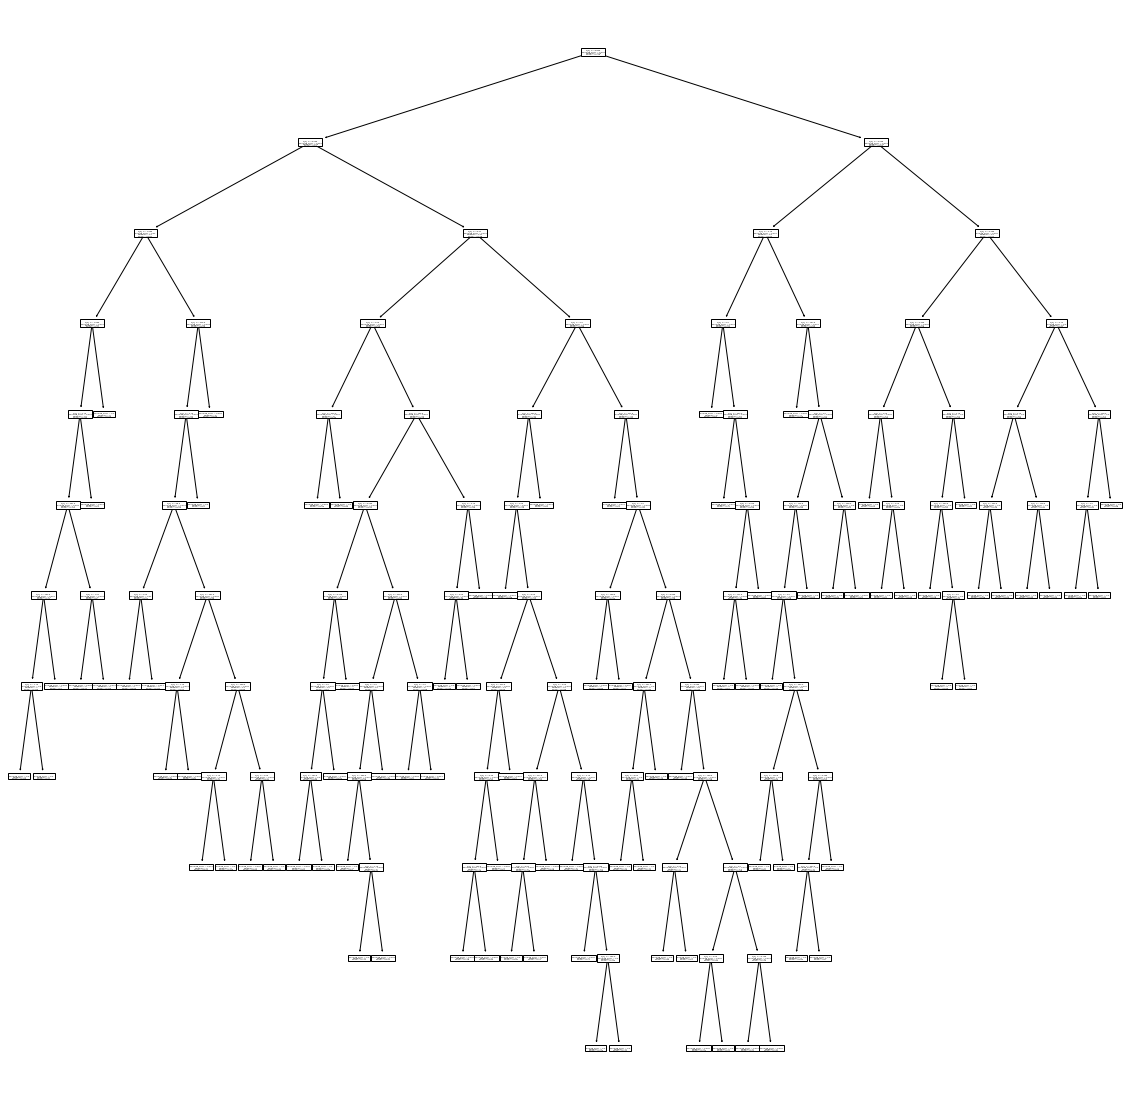

In [ ]:
#Visualize Decision Tree
plt.figure(figsize=(20,20)) 
tree.plot_tree(dtree_4); 

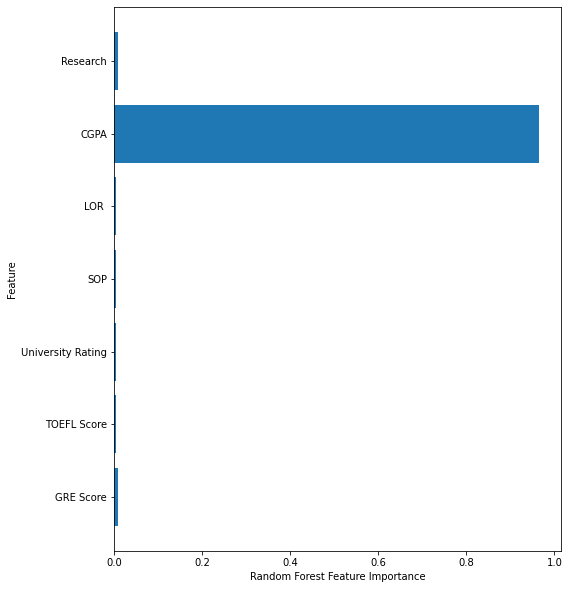

In [ ]:
#Visualize Random Forest
index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,n_forest_18.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [ ]:
#Normalized Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
train_data_normalized

array([[ 1.5401845 ,  1.21779426,  0.81465924, ...,  1.17017532,
         1.77502916,  0.89317009],
       [-1.00119934, -0.07365284, -0.94083542, ..., -1.08558433,
        -0.31409384, -1.11960758],
       [-0.74706096, -0.23508373, -0.06308809, ..., -1.08558433,
        -0.66228101,  0.89317009],
       ...,
       [ 0.52363096, -0.55794551, -0.06308809, ...,  0.60623541,
        -0.28093316,  0.89317009],
       [-0.40820978, -0.39651462, -0.06308809, ..., -0.52164442,
        -0.97730749,  0.89317009],
       [ 0.69305655, -0.07365284, -0.06308809, ...,  0.04229549,
         0.82994971,  0.89317009]])

In [ ]:
knn_norm= neighbors.KNeighborsRegressor(n_neighbors=17)
knn_norm.fit(train_data_normalized, train_sln)
knn_norm_preds= knn_norm.predict(test_data_normalized)
knn_norm_r2 = metrics.r2_score(test_sln, knn_norm_preds)
print("normalized kNN with k=18--r^2:", knn_norm_r2)

wknn_norm= neighbors.KNeighborsRegressor(n_neighbors=18, weights = 'distance')
wknn_norm.fit(train_data_normalized, train_sln)
wknn_norm_preds= wknn_norm.predict(test_data_normalized)
wknn_norm_r2 = metrics.r2_score(test_sln, wknn_norm_preds)
print("normalized Weighted kNN with k=18-- r^2:", wknn_norm_r2)

dtree_norm = tree.DecisionTreeRegressor(min_samples_leaf= 3)
dtree_norm.fit(train_data_normalized, train_sln)
dpreds_norm= dtree_norm.predict(test_data_normalized)
dr2_norm = r2_score(test_sln, dpreds_norm)
print("normalized Decision Tree with min_samples_leaf=3-- r^2:", dr2_norm)

n_forest_norm = RandomForestRegressor(min_samples_leaf = 18)
n_forest_norm.fit(train_data_normalized, train_sln)
n_forest_norm_preds = n_forest_norm.predict(test_data_normalized)
n_norm_r2=metrics.r2_score(test_sln, n_forest_norm_preds)
print("normalized Random Forest with min_samples_leaf=18-- r^2:", n_norm_r2)

normalized kNN with k=18--r^2: 0.7520500721148256
normalized Weighted kNN with k=18-- r^2: 0.7710229503361941
normalized Decision Tree with min_samples_leaf=3-- r^2: 0.7200438910828753
normalized Random Forest with min_samples_leaf=18-- r^2: 0.7417247183040159


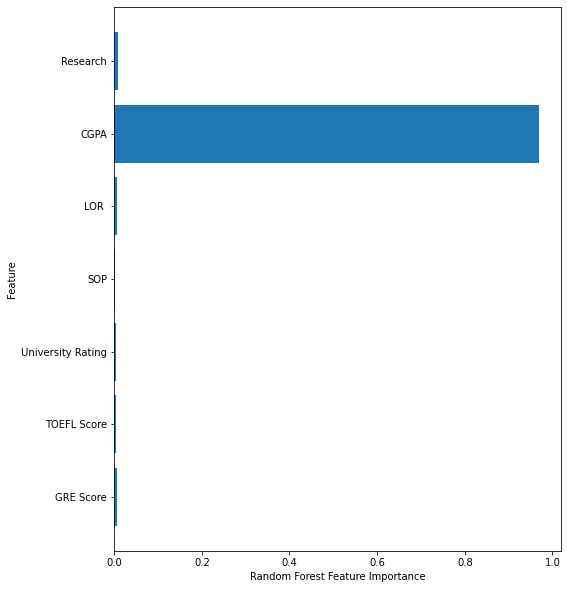

In [ ]:
plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,n_forest_norm.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

# 9. Bumps in the Road:
I've always found that I learn the most from these kinds of projects, and from where I get stuck. Keep track of these moments that you get stuck and chronicle them here: 
* why is my random forest and decision tree code not working
*   Which parameters should I tune for Decision Tree and Random Forest
* why are other parameters not tuning as well? 
* max_depth doesn't really have a clear trend
* n_estimators for Random Forest is also not indicating any clear trend
* min_samples_leaf works well and the graph clearly displayes an optimized value


What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?
The first challenge I has was with the implementation of my Decision Tree and Random Forest code. I ended up reusing some of the code that we had gone over in class or in group exercises, but for some reason, it was not working for my dataset. I looked back at my code line by line to try and figure out what wasn't working and I realized that when I copied over some of the code I was using DecisinTreeClassifier and RandomForestClassifier. This wouldn't have made any sense to use, since my target variable mandates regression techniques. I didn't have to change my strategy to fix these issues, but I did have to think more critically about what code I was reusing rather than just copy and pasting it. 


I wasn't sure which parameters to tune for the Decision Tree and Random Forest algorithms. For the kNNs, k is a clear parameter which can be tuned, but for the Decision Tree and Random Forest that choice is less obvious. This almost derailed my strategy as I was prepared to not optimize any parameter for the decision trees. Instead, I looked in the API documentation and started experimenting with different parameters to be tuned. Some of the parameters produced graphs with no clear trend, but min_samples_leaf appeared to yeild a trend that was relatively straightforward to interpret. As min_samples_leaf increased, r^2 decreased. I often struggle with getting discouraged when my code doesn't run the first time or when my first instinct is not correct, so I am happy that I overcame this challenge by taking a step back and trying new things until one worked. 

# 10. Conclusions

You don't necessarily have to answer all of these questions, but include a discussion of what you learned from this project. Discussions may include: 
- What insights/recommendations do you have? 
- What did you find that was interesting? 
- Which model was your best model, which models didn't work well?
- Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Based on the models above, one could predict Chance of Admit more successfully using machine learning than using naive tactics. The $R^2$ value for naive tactics was less than 0, and all of the models produced an $R^2$ near .75 which is a significant improvement. 

The most interesting thing that I learned was that CGPA is the most important feature that predicts a student's chance of admittance by a wide margin. Because of this, I was surpised that the most successful model was the Weighted K-Nearest Neighbors. Though all of the models produced a similar $R^2$ score, this metric was slightly higher for the Weighted kNN, followed by the kNN. This is surpising because looking at the Feature Importance table produced from the Random Forest model, we can see that CGPA (College Grade Point Average) is the only significant feature by a wide margin. Considering that this feature almost single-handedly predicts Chance of Admittance, I would have thought that the Decision Tree and Random Forest would have been the better models. A reason for this could be that I chose to tune an insignificant parameter. Additionally, its possible that because the other features were insignificant to the prediction, the Decision Tree and Random Forest could not distinguish between test data that is evaluated further down in the decision tree after CGPA had already been considered. The size of the Decision Tree lends credence to this idea. 

